In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-20m.zip

--2020-07-03 00:56:05--  http://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  26.1MB/s    in 8.0s    

2020-07-03 00:56:13 (23.7 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]



In [ ]:
!unzip -n ml-20m.zip

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


In [ ]:
df = pd.read_csv('ml-20m/ratings.csv')
df.head()

userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

In [ ]:
df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes

In [ ]:
df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes

In [ ]:
user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

In [ ]:
N = len(set(user_ids))
M = len(set(movie_ids))
K = 10

In [ ]:
u = Input(shape=(1,))
m = Input(shape=(1,))
u_emb = Embedding(N, K)(u)
m_emb = Embedding(M, K)(m)
u_emb = Flatten()(u_emb)
m_emb = Flatten()(m_emb)
x = Concatenate()([u_emb, m_emb])
x = Dense(1024, activation='relu')(x)
x = Dense(1)(x)

In [ ]:
model = Model(inputs=[u, m], outputs=x)
model.compile(
    loss='mse',
    optimizer=SGD(lr=0.08, momentum=0.9)
)

In [ ]:
user_ids, movie_ids, ratings = shuffle(user_ids, movie_ids, ratings)
Ntrain = int(0.8 * len(ratings))
train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]
test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]
avg_rating = train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating

In [ ]:
r = model.fit(
    x=[train_user, train_movie],
    y=train_ratings,
    epochs=25,
    batch_size=1024,
    verbose=2,
    validation_data=([test_user, test_movie], test_ratings),
)

Epoch 1/25
15626/15626 - 57s - loss: 0.7766 - val_loss: 0.7209
Epoch 2/25
15626/15626 - 57s - loss: 0.7005 - val_loss: 0.6984
Epoch 3/25
15626/15626 - 56s - loss: 0.6767 - val_loss: 0.6904
Epoch 4/25
15626/15626 - 55s - loss: 0.6618 - val_loss: 0.6746
Epoch 5/25
15626/15626 - 56s - loss: 0.6518 - val_loss: 0.6722
Epoch 6/25
15626/15626 - 54s - loss: 0.6403 - val_loss: 0.6600
Epoch 7/25
15626/15626 - 55s - loss: 0.6238 - val_loss: 0.6489
Epoch 8/25
15626/15626 - 55s - loss: 0.6091 - val_loss: 0.6423
Epoch 9/25
15626/15626 - 54s - loss: 0.5995 - val_loss: 0.6404
Epoch 10/25
15626/15626 - 53s - loss: 0.5919 - val_loss: 0.6373
Epoch 11/25
15626/15626 - 55s - loss: 0.5853 - val_loss: 0.6351
Epoch 12/25
15626/15626 - 53s - loss: 0.5790 - val_loss: 0.6338
Epoch 13/25
15626/15626 - 53s - loss: 0.5727 - val_loss: 0.6316
Epoch 14/25
15626/15626 - 52s - loss: 0.5672 - val_loss: 0.6322
Epoch 15/25
15626/15626 - 51s - loss: 0.5619 - val_loss: 0.6322
Epoch 16/25
15626/15626 - 52s - loss: 0.5574 - va

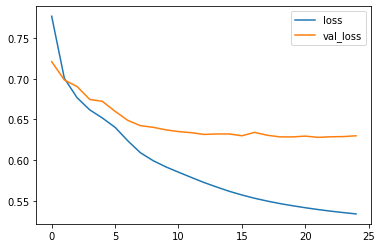

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
np.sqrt(0.6299)

0.7936623967405789